In [23]:
import torch
import numpy as np
from utils import prediction,normalization,discrete_missing,continuous_missing,calculate_missing_ratio,get_pseudo_color_img
import time
import matplotlib.pyplot as plt
import random
from skimage.metrics import structural_similarity,peak_signal_noise_ratio

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
assert device.type!='cpu' # Only GPU inference supported currently

Loading models and data

In [24]:
model = torch.jit.load('network/MDA_GAN.pt').to(device).half()
data = normalization(np.load('data/Parihaka.npy'))
print('Data shape is', data.shape)

Data shape is (272, 160, 160)


50% discrete missing

iline random discrete missing proportion: 50.0%
The SSIM metric is: 0.9865660370702447
The PSNR metric is: 36.5774633953084


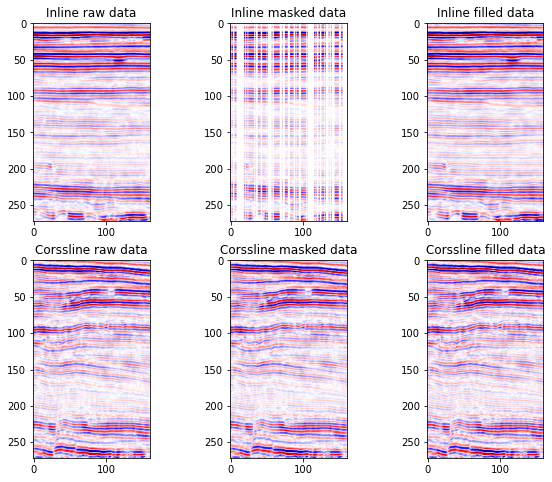

In [25]:
mask = discrete_missing(data, proportions=(0.5,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask) * 0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

75% discrete missing

iline random discrete missing proportion: 75.0%
The SSIM metric is: 0.9804358886241201
The PSNR metric is: 34.94362842047441


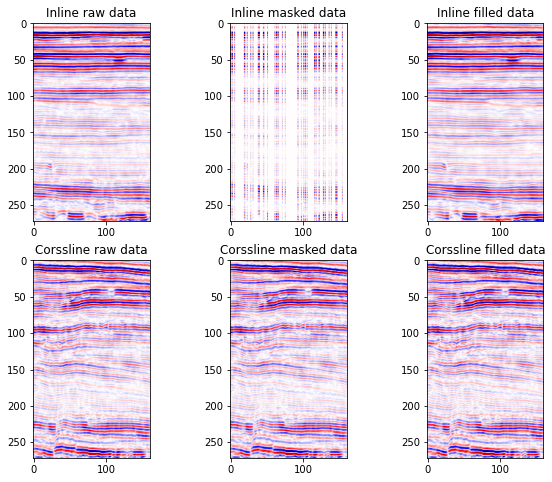

In [26]:
mask = discrete_missing(data, proportions=(0.75,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

90% discrete missing

iline random discrete missing proportion: 90.0%
The SSIM metric is: 0.9583341366408419
The PSNR metric is: 31.32204899756585


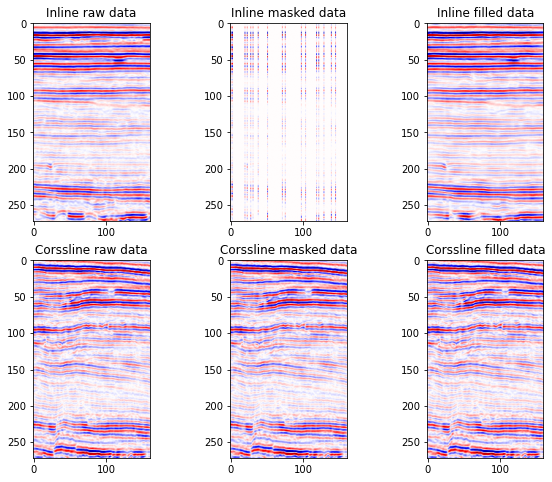

In [27]:
mask = discrete_missing(data, proportions=(0.9,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

95% discrete missing in xline direction.

iline random discrete missing proportion: 95.0%
The SSIM metric is: 0.9245137297634071
The PSNR metric is: 28.547852130441044


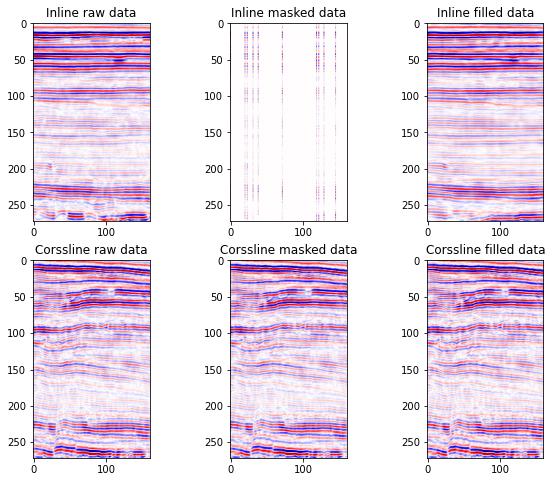

In [28]:
mask = discrete_missing(data, proportions=(0.95,), directions=('iline',),show_slices= (-16,))


masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

50 consecutive missing traces

iline continuous missing traces: 40, missing start trace 100
The SSIM metric is: 0.9687845914771954
The PSNR metric is: 32.598904138570724


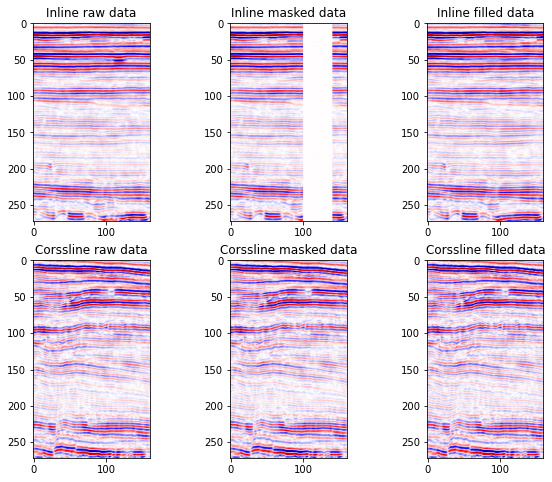

In [31]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(40,), directions=('iline',),start_missing=(100,))

masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

75 consecutive missing traces

iline continuous missing traces: 70, missing start trace 85
The SSIM metric is: 0.9356730514228392
The PSNR metric is: 29.113451818608187


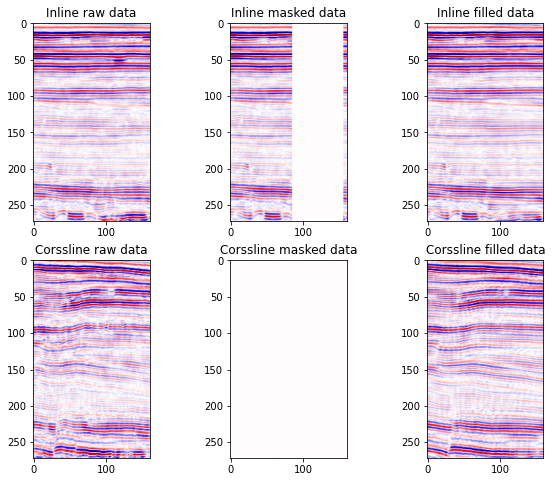

In [33]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(70,), directions=('iline',),start_missing=(85,))

masked_data = data * mask  + (1 - mask)*0.5
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

100 consecutive missing traces

iline continuous missing traces: 100, missing start trace 30
The SSIM metric is: 0.8826716266975986
The PSNR metric is: 26.759133472427017


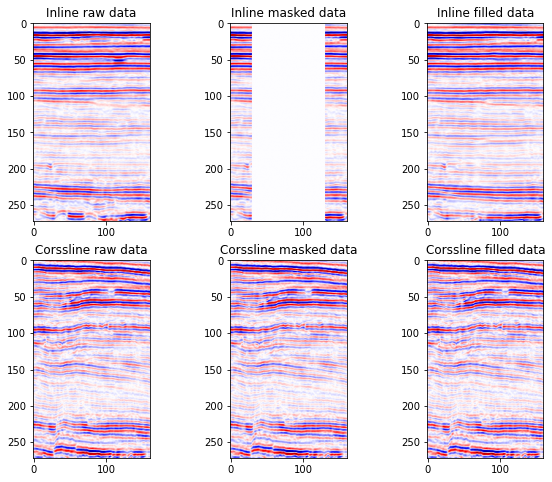

In [35]:
random.seed(2022)
mask = continuous_missing(data, num_traces=(100,), directions=('iline',),start_missing=(30,))

masked_data = data * mask  + (1 - mask)*(np.sum(data * mask) / np.sum(mask))
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = -16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)

Mixed Missing

iline continuous missing traces: 100, missing start trace 30
iline random discrete missing proportion: 75.0%
The total missing proportion: 90.625%
The SSIM metric is: 0.8670746659820273
The PSNR metric is: 26.001257358176936


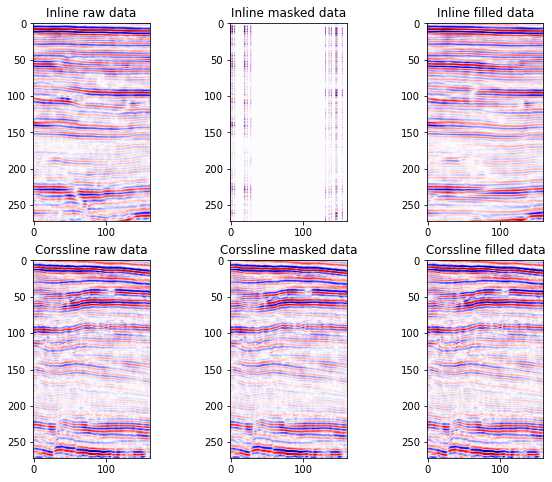

In [37]:
random.seed(2022)
np.random.seed(2022)
mask = continuous_missing(data, num_traces=(100,), directions=('iline',),start_missing=(30,))
mask = discrete_missing(data, proportions=(0.75,), directions=('iline',),show_slices= (-16,),mask = mask)

print('The total missing proportion:',f'{calculate_missing_ratio(mask)*100}%')
masked_data = data * mask  + (1 - mask)*(np.sum(data * mask) / np.sum(mask))
filled_data = prediction(model,masked_data,device)
print('The SSIM metric is:', structural_similarity(data, filled_data))
print('The PSNR metric is:', peak_signal_noise_ratio(data, filled_data))
show_slice = 16
org_iline_slice = data[:,show_slice,:]
masked_iline_slice = masked_data[:,show_slice,:]
filled_iline_slice = filled_data[:,show_slice,:]

plt.figure(figsize=(10,8))
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_iline_slice, masked_iline_slice, filled_iline_slice)
plt.subplot(2,3,1)
plt.title('Inline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,2)
plt.title('Inline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,3)
plt.title('Inline filled data')
plt.imshow(filled_slice)

show_slice = -16
org_xline_slice = data[:,:,show_slice]
masked_xline_slice = masked_data[:,:,show_slice]
filled_xline_slice = filled_data[:,:,show_slice]
org_slice, masked_slice, filled_slice = get_pseudo_color_img(org_xline_slice, masked_xline_slice, filled_xline_slice)

plt.subplot(2,3,4)
plt.title('Corssline raw data')
plt.imshow(org_slice)
plt.subplot(2,3,5)
plt.title('Corssline masked data')
plt.imshow(masked_slice)
plt.subplot(2,3,6)
plt.title('Corssline filled data')
plt.imshow(filled_slice)